# Mini Project: Logistic Regression

**NOTE: My write-up is at the end of this document**

Logistic Regression models the probability that a given input belongs to a certain class. It's suitable when the target variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No), although it can also be extended for problems with more than two classes. The key idea behind logistic regression is to model the relationship between the input variables (features) and the probability of the outcome.

In logistic regression, the linear combination of input features is transformed using a logistic function (also known as the sigmoid function), which ensures that the output is between 0 and 1. This output can be interpreted as the probability of the instance belonging to a particular class.

**Advantages of Logistic Regression:**

1. **Simple and Interpretable:** Logistic regression is a straightforward algorithm that's relatively easy to understand and interpret. The output is the probability of belonging to a certain class, and the coefficients associated with each feature provide insights into feature importance.

2. **Efficient for Small Datasets:** It works well with small datasets where the number of samples is not very large. It's less prone to overfitting in such cases compared to complex models.

3. **Works Well for Linearly Separable Data:** When the classes are separable by a linear decision boundary, logistic regression can perform quite well.

4. **Good Starting Point:** Logistic regression is often used as a starting point for understanding a classification problem. It can serve as a baseline model against which more complex algorithms can be compared.

5. **Regularization:** Logistic regression can be regularized to prevent overfitting. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can be applied to control the complexity of the model.

6. **Probability Estimation:** Logistic regression not only provides class predictions but also outputs the probability of the prediction. This can be useful for decision-making in cases where the cost of misclassification varies.

However, it's important to note that logistic regression also has its limitations. It assumes a linear relationship between features and the log-odds of the target variable, which might not be suitable for highly complex relationships. Additionally, it might struggle with handling non-linear data without feature transformations. In such cases, more advanced techniques like decision trees, random forests, or neural networks might be more appropriate.

In this project you'll get some experience building a logistic regression model for the [Wisconsin Breast Cancer Detection dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Note, the task of training a logistic regression model has largely been asbtracted away by libraries like Scikit-Learn. In this mini-project we'll focus more on model evaluation and interpretation.  


First, let's import all the libraries we'll be using.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Logistic Regression, like many statistical methods, comes with certain assumptions about the underlying data. Here are the main assumptions associated with logistic regression:

1. **Binary Outcome:** Logistic regression is designed for binary classification problems, where the dependent variable (target) should have two categories or levels. If you have a multi-class problem, you would typically use multinomial logistic regression or other appropriate techniques.

2. **Independence of Observations:** The observations (samples) should be independent of each other. This means that the outcome of one observation should not be influenced by the outcome of another observation. This assumption is often met when the data is collected using random sampling or experimental designs.

3. **Linearity of Log-Odds:** The relationship between the log-odds of the outcome and the predictors should be linear. In other words, the log-odds of the outcome variable should change linearly with changes in the predictor variables. This assumption can be checked by examining scatter plots and residual plots.

4. **No Multicollinearity:** There should not be high multicollinearity among the predictor variables. Multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome. Techniques like variance inflation factor (VIF) can be used to assess multicollinearity.

5. **Large Sample Size:** While logistic regression is generally more robust to violations of assumptions compared to linear regression, having a reasonably large sample size helps in obtaining stable and reliable parameter estimates.

6. **Sufficient Variability in the Outcome:** The outcome variable should exhibit variation across different values of the predictor variables. If all values of a predictor are the same within a level of the outcome, the model may not be able to estimate the effect of that predictor.

7. **No Extreme Outliers:** Extreme outliers can influence the estimation of coefficients and affect the overall performance of the model. It's a good practice to identify and handle outliers before fitting the model.

It's important to note that while these assumptions are important to understand, logistic regression is often used in real-world scenarios where some of these assumptions may not be perfectly met. In such cases, it's crucial to assess the impact of potential violations on the model's results and make informed decisions about the model's suitability and reliability.

If the assumptions are significantly violated, it might be worth considering other techniques like decision trees, random forests, or support vector machines, which might be more robust to certain types of data characteristics. One of the best ways to see if logistic regression is suitable for a problem is to simply train a logistic regression model and evaluate it on test data.

Here are your tasks:

1. Load the [breast cancer data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) into a Pandas dataframe and create variables for the features and target.
2. Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

In [ ]:
# Load data and split into feature and target variables

# Use as_frame = True to get data as pandas objects
data = load_breast_cancer(as_frame = True)
# Use X and y for feature and target variables
X = data.data
y = data.target

In [ ]:
# View first 5 rows of the data

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# How frequently does the positive target occur?

## Swap 0 and 1 so that 1 codes for malignant (i.e., positive for cancer)
## https://stackoverflow.com/questions/1779286/swapping-1-with-0-and-0-with-1-in-a-pythonic-way
y = 1 - y
## Save target names in correct order
## https://stackoverflow.com/questions/6771428/most-efficient-way-to-reverse-a-numpy-array
target_names = data.target_names[::-1]

# Answer 1 - This just shows 0 and 1
y.value_counts()

,count
target,
0,357
1,212


In [ ]:
# How frequently does the positive target occur?

# Answer 2 - Let's print counts of target names rather than 0 and 1

# Count ocurrences of each name
pd.Series(target_names[y]).value_counts()

,count
benign,357
malignant,212


In [ ]:
# Generate summary statistics for the data

print(X.isnull().sum(axis = 0))
X.describe()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


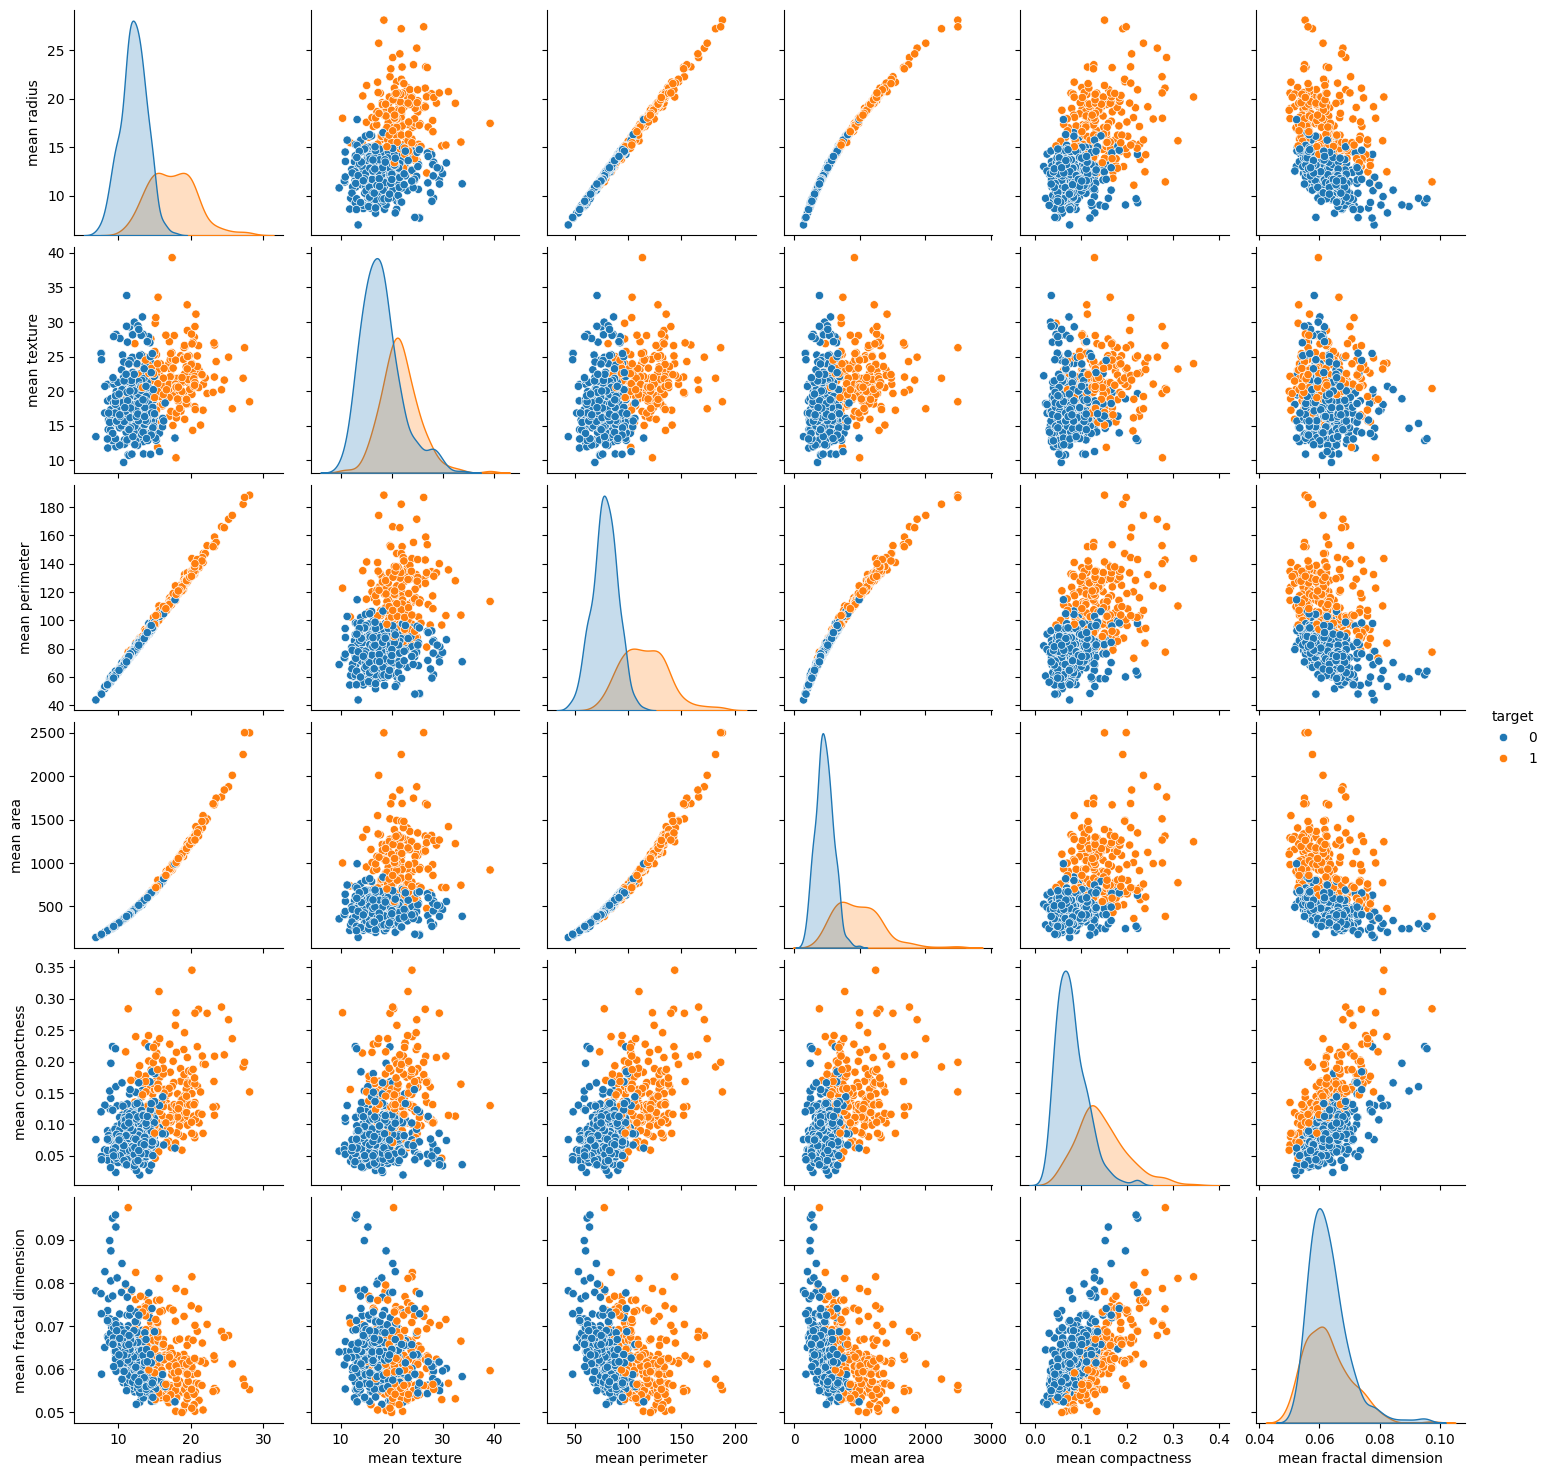

In [ ]:
# Create a pairplot for the first few features

# Make a new DataFrame with selected features and the target variable (for coloring points)
# NB. I have selected additional features to show possible interactions - see end of write-up
newdf = X.iloc[:, np.r_[0:4, 5, 9]]
newdf = newdf.merge(pd.DataFrame(y), left_index = True, right_index = True)
sns.pairplot(newdf, hue = 'target')

<Axes: >

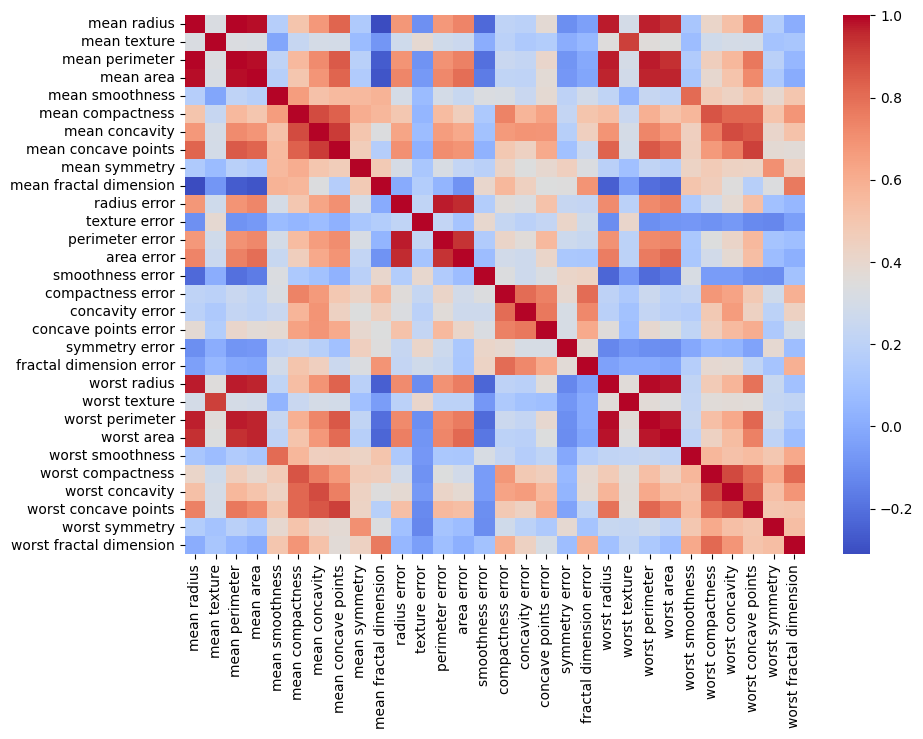

In [ ]:
# Create a correlation coefficient heatmap

# Increase figure size to see all labels
plt.figure(figsize=(10,7))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap = 'coolwarm')

<Axes: ylabel='mean radius'>

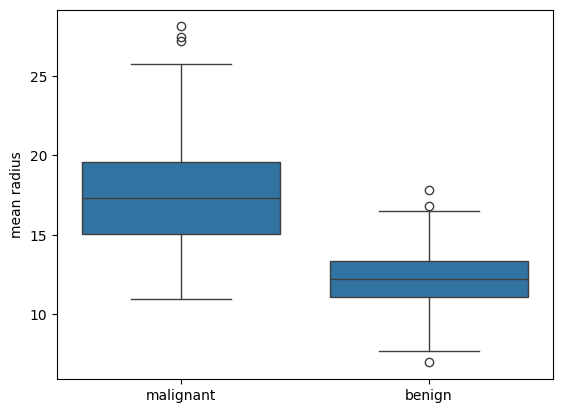

In [ ]:
# Create a boxplot for mean radius by target type

sns.boxplot(x = target_names[y], y = X['mean radius'])

With a better feel for the data, it's time to attempt to build a logistic regression model.

1. Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and test sets for the data.
2. Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

In [ ]:
# Build and train logistic regression model

# Instantiate the model with the liblinear solver
LR_model = LogisticRegression(solver = "liblinear")
# Fit the model to the training data
LR_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

As you can see, training a logistic regression model is simple. The more important task is evaluating the model and determining if it's any good. For classification problems, a good starting point for model evaluation is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed breakdown of how well a model's predictions align with the actual outcomes in a binary classification problem. It's particularly useful for understanding the types of errors a model is making.

A confusion matrix is typically presented as a table with four entries:

- **True Positives (TP):** The number of instances that were correctly predicted as positive (belonging to the positive class).

- **True Negatives (TN):** The number of instances that were correctly predicted as negative (belonging to the negative class).

- **False Positives (FP):** Also known as a Type I error. The number of instances that were predicted as positive but actually belong to the negative class.

- **False Negatives (FN):** Also known as a Type II error. The number of instances that were predicted as negative but actually belong to the positive class.

Here's how these four components fit into the confusion matrix:

```
                Predicted
               |  Positive  |  Negative
Actual  Positive |    TP      |    FN
        Negative |    FP      |    TN
```

Each cell of the confusion matrix represents a specific classification outcome. The goal is to have as many instances as possible in the TP and TN cells, and as few as possible in the FP and FN cells.

From the confusion matrix, several evaluation metrics can be calculated:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

   `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision:** The proportion of correctly predicted positive instances out of all predicted positive instances. It measures the model's ability to avoid false positives.

   `Precision = TP / (TP + FP)`

- **Recall (Sensitivity or True Positive Rate):** The proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to capture all positive instances.

   `Recall = TP / (TP + FN)`

- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives.

   `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`

Confusion matrices provide valuable insights into the strengths and weaknesses of a classification model. They allow you to understand where the model is making mistakes and guide further improvements or adjustments.

Here are your tasks:

1. Use your model to make predictions on the test data.
2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
3. Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.

Note, the macro average in the report calculates the metrics independently for each class and then takes the average across all classes. In other words, it treats all classes equally, regardless of their frequency in the dataset. This can be useful when you want to assess the model's overall performance without being biased by the class imbalances.

The weighted average in the report, on the other hand, calculates the metrics for each class and then takes the average, weighted by the number of true instances for each class. This gives more weight to classes with more instances, which can be particularly useful in imbalanced datasets where some classes might have much fewer instances than others.

In [ ]:
# Evaluate the model

# Predict class labels
y_pred = LR_model.predict(X_test)
print("Predicted labels:")
print(y_pred)
# Use score method to get accuracy of the model
accuracy = LR_model.score(X_test, y_test)
print("Accuracy of model is " + str(accuracy))

Predicted labels:
[0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1
 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0
 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1]
Accuracy of model is 0.9440559440559441


[[82  3]
 [ 5 53]]


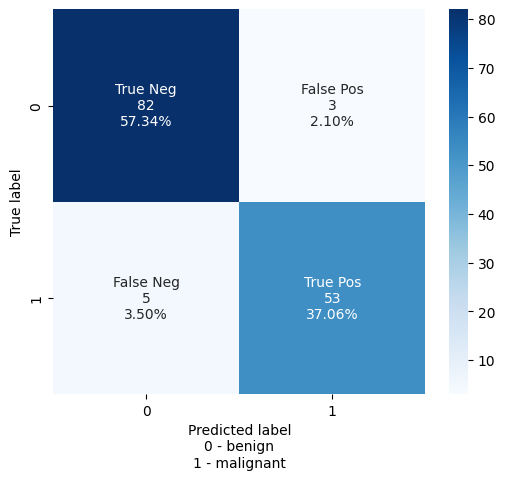

In [ ]:
# Generate a confusion matrix

# This calculates and prints the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

# Simple visualization with percentages
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

# This visualizes the confusion matrix with percentages and labels
# Modified from:
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label' + '\n0 - benign\n1 - malignant')
plt.show()

In [ ]:
# Generate a classification report
print(classification_report(y_test, y_pred, target_names = ['benign', 'malignant']))

              precision    recall  f1-score   support

      benign       0.94      0.96      0.95        85
   malignant       0.95      0.91      0.93        58

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



Feature importance refers to the process of determining and quantifying the contribution of each feature (also known as predictor variable or attribute) in a machine learning model towards making accurate predictions. It helps in understanding which features have the most significant impact on the model's output and can be crucial for interpreting and explaining the model's behavior.

In logistic regression models, you can calculate feature importance by examining the coefficients associated with each feature. These coefficients indicate the change in the log-odds of the target variable for a one-unit change in the corresponding feature, while keeping other features constant. The magnitude of the coefficient reflects the strength of the impact that the feature has on the predicted outcome.

The magnitude of the coefficients indicates the importance of each feature. Larger magnitudes imply a stronger impact on the predicted probability of the positive class.

**Positive Coefficient**: An increase in the feature value leads to an increase in the log-odds of the positive class, implying a higher probability of belonging to the positive class.

**Negative Coefficient**: An increase in the feature value leads to a decrease in the log-odds of the positive class, implying a lower probability of belonging to the positive class.

Remember that the scale of the features matters when interpreting coefficients. If features are on different scales, their coefficients won't be directly comparable. This is where normalization can be helpful. Also, keep in mind that this interpretation assumes a linear relationship between the features and the log-odds of the target variable. If your logistic regression model includes interactions or polynomial terms, the interpretation can become more complex. Additionally, be cautious about interpreting coefficients as causal relationships, as logistic regression only captures associations, not causal effects.

Here are your tasks:

1. Extract the model coefficients from your trained model.
2. Normalize the coefficients by the standard deviation of each feature in the training data.
3. Sort feature names and coefficients by absolute value of coefficients.
4. Visualize the feature importances by creating a horizontal bar chart using e.g. [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

In [ ]:
# Extract coefficients

# Use [0] to return the first row (i.e. one row for each class after the first)
coeff = LR_model.coef_[0]
print(coeff)

[-1.57760532 -0.14719496  0.13814271 -0.00674074  0.07322134  0.2675558
  0.46775263  0.21909045  0.12018888  0.00952927 -0.04871889 -1.09330792
 -0.48520705  0.1392313   0.00999387  0.03075129  0.07078913  0.03096285
  0.00848543  0.00242004 -1.83384339  0.34384351  0.0975423   0.02964498
  0.17910792  0.94128888  1.40511884  0.4836614   0.26930225  0.08999423]


In [ ]:
# Normalize the coefficients by the standard deviation

coeff_std = coeff * np.std(X_train, 0)

In [ ]:
# Sort feature names and coefficients by absolute value of coefficients

coeff_std_sort = abs(coeff_std).sort_values(ascending = True)
print(coeff_std_sort)

fractal dimension error     0.000006
smoothness error            0.000027
symmetry error              0.000064
mean fractal dimension      0.000065
concave points error        0.000183
compactness error           0.000526
mean smoothness             0.001016
worst fractal dimension     0.001645
concavity error             0.002038
mean symmetry               0.003148
worst smoothness            0.004041
mean concave points         0.008129
mean compactness            0.013032
radius error                0.013549
worst symmetry              0.015501
worst concave points        0.031606
mean concavity              0.035698
worst compactness           0.147536
worst concavity             0.289657
texture error               0.597521
mean texture                0.631942
perimeter error             0.969579
worst texture               2.108273
mean area                   2.356058
worst perimeter             3.195104
mean perimeter              3.302935
mean radius                 5.491892
a

<Axes: >

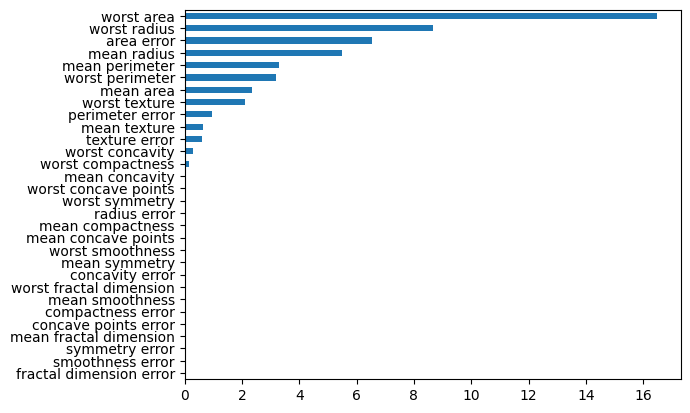

In [ ]:
# Visualize feature importances
#feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

coeff_std_sort.plot.barh()

# Write-up by Jeffrey Dick

## Data preprocessing

I loaded the dataset with `as_Frame = True` to get the data in pandas format, then grouped the features and targets into `X` and `y` variables. The `.head()` method shows numeric values with different values for the variables, which are all positive real numbers. There are 357 benign and 212 malignant cases. Note that the positive class (as in *positive for cancer*) is coded by 0 rather than 1.

The answer to the question, "How frequently does the positive target occur?", is 212. I verified this answer by checking the [scikit-learn User Guide](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset), which shows "Class Distribution: 212 - Malignant, 357 - Benign".

**Important**: In the following discussion, I interpret "positive target" to mean "positive for cancer". Althogh the positive (malignant) class is coded by 0 in the provided dataset, the positive class usually is associated with 1 in machine learning. For instance, [Prayas.singh@outlook.com on Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/04/confusion-matrix-detailed-intuition-and-trick-to-learn) states that "0 represents negative and 1 represents positive labels". Therefore, to maintain consistent labels for the downstream analysis, I have swapped 0 and 1 in the target variable.

## Exploratory data analysis

After printing the summary statistics and checking that there are no NULL values, it's time to visualize the data. The pairplot shows high covariation between radius, perimeter, and area, which is not surprising as they are all geometric features. Visualizing the correlation matrix with `sns.heatmap` reveals some other positive correlations, particularly between *mean* and *error* of radius, perimeter, and area, and also between *mean* and *worst* values of smoothness, compactness, concavity, and concave points. The scale on the heatmap only goes down to -0.3, so there are no large negative correlations between variables. Finally, the boxplot shows that the mean radius tends to be higher for malignant than for benign cases.

## Model training and evaluation

To make the analysis reproducible, I used the `random_state` argument in `train_test_split()`. The model instantiation uses `solve = "liblinear"` as the only non-default argument. The model evalutation on the test data returns an accuracy of 94%. The confusion matrix separates the accuracy into two components: 57% True Negatives (*malignant* cases) and 37% True Positives (*benign* cases). The remaining predictions are 4% False Negatives and 2% False Positives.

The metrics generated by the classification report summarize the model performance in more detail. **Precision** is the ratio of true predicted positives to all predicted positives, and **recall** is the ratio of true predicted positives to all true positives. The **macro average** is the average of the metrics at the group level (in this dataset, for the malignant and benign groups) and the **weighted average** is the average taking into account the number of observations in each group. The weighted average precision and recoll for this model are both 94%. The **F1 score**, which is the harmonic mean of precision and recoll, is therefore also 94%. Finally, the **accuracy**, or ratio of true predictions to all predictions, is also 94%. In general, however, there is no requirement for accuracy and F1 score to be equal.

## Feature importance

The coefficients of the model are a measure of feature importance - in general, larger absolute values of coefficients correspond to more important features. However, because features may have different scales, the coefficients should be normalized (multiplied) by the standard deviation of the features *in the training set* in order to compare features with different ranges of values.

The outcome is that *worst area* is the most important feature, followed by *worst radius*. (According to the dataset documentation, *worst area* is the mean of the three largest areas of cell nuclei in the image.) Interestingely, *area error* is the next most important feature, suggesting that variability in the areas of cell nuclei is another characteristic of breast cancer cells.

## Moving forward - other ways to measure importance, and feature engineering

There are many alternative methods for feature importance, which may be more insightful than just comparing model coefficients. See https://www.geeksforgeeks.org/understanding-feature-importance-in-logistic-regression-models.

Feature interactions should be considered for improving the performance of the model. For instance, neither *mean compactness* nor *fractal dimension* emerge as important features in the current model. However, the pairplot visualization above suggests that the interaction between these features may be useful to improve classifiction accuracy.